### __BUSA8001 Group Assignment - Predicting Used Car Prices__

--- 

**Kaggle Competition Ends:** Friday, 1 Nov 2024 @ 3:00pm (Week 13)  
**Assignment Due Date on iLearn:** Friday, 1 Nov 2024 @ 11.59pm (Week 13)   
**Total Marks:** 30

**Overview:**   

- In the group assignment you will form a team of 3 students and participate in a forecasting competition on Kaggle
- The goal is to predict prices of used cars based on car characteristics and regression models

**Instructions:** 

- Form a team of 3 students 
- Each team member needs to join [https://www.kaggle.com](https://www.kaggle.com/)  
- Choose a team leader and form a team on Kaggle [https://www.kaggle.com/t/78dcb64267834777ae9a3d67ab573424](https://www.kaggle.com/t/78dcb64267834777ae9a3d67ab573424)
    - Team leader to click on `team` and invite other 2 team members to join
    - Your **team's name must start** with our unit code, for instance you could have a team called BUSA8001_masterful_geniuses
- All team members should work on all the tasks however   
    - Each team member will be responsible for one of the 3 tasks listed below    
- **Your predictions must be generated by a model you develop here** 
    - You will receive a mark of **zero** if your code is not able produce the forecasts you submit to Kaggle 

**Competition Rankings**

The rankings for the competition are determined through two different leaderboards:

- **Public Leaderboard Ranking**: Available during the competition, these rankings are calculated based on 50% of the test dataset, which includes 2,000 observations. This allows participants to see how they are performing while the competition is still ongoing.
- **Final Leaderboard Ranking**: These rankings are recalculated from the other 50% of the test dataset, which consists of the remaining 2,000 observations, and are revealed 5 minutes after the competition concludes. This final evaluation determines the ultimate standings of the competition.



**Marks** 

- Assignment: 30 marks consisting of Solutions (27 marks) + Video Presentation (3 marks)
- **Each Student's Mark: 50% x overall assignment mark + 50% x mark for the task that you are responsible for**  



**Submissions:**  

1. On Kaggle: submit your team's forecast in order to be ranked by Kaggle
2. On iLearn **only team leader to submit** the assignment Jupyter notebook re-named to your team's name on Kaggle   
    - The Jupyter notebook must contain team members names/ID numbers, and the group name Kaggle
    - One 15 minute video recording of your work 
        - 5 marks will be deducted from each Task for which there is no video presentation   


---
---

**Fill out the following information**

- Team Name on Kaggle: `BUSA8001_analytical_maestros`
- Team Leader and Team Member 1: `Deepali Raj/ 48023787 (Team Leader)`
- Team Member 2: `Sarah Jane Daniel/ 47998105`
- Team Member 3: `Abhay Sachdeva/ 47937625`

---

## Task 1: Problem Description and Initial Data Analysis

**Total Marks: 9**   

Based on the Competition Overview, datasets and additional information provided on Kaggle, along with insights gained from personal research of the topic, write **Problem Description** (about 500 words) focusing on the sections listed below: 
1. Forecasting Problem - explain what we are trying to do and how it could be used in the real world, e.g. who and how may benefit from it (2 marks)    
2. Evaluation Criteria - discuss the criteria that is used in this competition to assess forecasting performance in detail (2 marks)     
3. Categorise the variables provided in the dataset according to their type; Hint: similar to what we had in Programming Task 1 (2 marks)  
4. Missing Values - only explain what you find for both the training and test datasets at this stage (2 marks)
5. Provide and discuss some interesting *univariate* data characteristics (e.g. summary statistics and plots) in the training dataset  (1 marks)       
- Hints:
    - You should **not** discuss any specific predictive algorithms at this stage
  


Student in charge of this task: `Sarah Jane Daniel`

1.
Our goal is to create a model that accurately predicts used car prices based on car features. This is useful in several ways:
a. 
Car Dealers: Accurate price predictions help dealers set fair prices and manage inventory better. This lets them adjust prices based on demand and increase sales.b. 

Financial Institutions: Reliable price predictions help banks set the right loan amounts, reducing the risk of lending too much or too littlc. e.

Private Buyers and Sellers: Accurate pricing supports fair deals, helping buyers and sellers agree on a price that matches the market, making the sale process more trustworthy.

2.
This competition uses Root Mean Square Error (RMSE) to measure accuracy. RMSE calculates average error and penalizes large mistakes . This makes it ideal for price predictions, 
where big errors can have greater financial impacts. A lower RMSE means predictions are closer to actual prices, ensuring the model is accurate and reliable across different price ranges


3.
Numeric features(20)- city_fuel_economy, daysonmarket, engine_displacement, highway_fuel_economy, horsepower, latitude, longitude, mileage, savings_amount, year, dealer_zip, power,
torque,wheelbase, width, height, front_legroom, back_legroom, listed_date, price(target variable)

Nominal	features(14)-vin, body_type, city, engine_type, exterior_color, fuel_type, interior_color, listing_color, make_name, model_name, transmission, transmission_display, wheel_system, is_new

Ordinal features(2) - maximum_seating, seller_rating

In [1]:
#Task 1

#4. Import necessary libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

# Load your datasets (replace 'train.csv' and 'test.csv' with your actual file paths if necessary)
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Check for missing values in the training dataset
missing_values_train = train_data.isnull().sum()
missing_values_train = missing_values_train[missing_values_train > 0].sort_values(ascending=False)
print("Missing values in the training dataset:")
print(missing_values_train)

# Check for missing values in the test dataset
missing_values_test = test_data.isnull().sum()
missing_values_test = missing_values_test[missing_values_test > 0].sort_values(ascending=False)
print("\nMissing values in the test dataset:")
print(missing_values_test)

Missing values in the training dataset:
mileage                 331
latitude                139
savings_amount          121
franchise_dealer        102
seller_rating            99
transmission             89
transmission_display     89
back_legroom              7
front_legroom             7
height                    7
maximum_seating           7
wheelbase                 7
width                     7
power                     5
wheel_system              3
dtype: int64

Missing values in the test dataset:
torque                  505
city_fuel_economy       455
highway_fuel_economy    455
power                   447
mileage                 205
transmission_display     78
transmission             78
engine_type              72
latitude                 71
savings_amount           59
fuel_type                54
franchise_dealer         46
seller_rating            43
horsepower               40
engine_displacement      40
wheelbase                32
back_legroom             32
maximum_seatin

Both the training and test datasets exhibit missing values, particularly interior_color, mileage and latitude. Additionally, essential features such as torque, fuel economy, and power have missing entries in the test set. Handling these missing values will be crucial to ensure model reliability as these attributes are significant for accurately capturing vehicle characteristics.

In [2]:
# 5.Import necessary libraries
import pandas as pd

# Load the training dataset
train_data = pd.read_csv('train.csv')

# Display summary statistics for numerical features
print("Summary statistics for numerical features:")
print(train_data.describe())

Summary statistics for numerical features:
       city_fuel_economy  daysonmarket    dealer_zip  engine_displacement  \
count        8000.000000   8000.000000   8000.000000          8000.000000   
mean           21.382250     76.505750  50482.170125          2919.187500   
std             4.825769    105.707208  27232.711121          1225.838866   
min            10.000000      0.000000   1060.000000          1000.000000   
25%            18.000000     15.000000  30012.750000          2000.000000   
50%            21.000000     36.000000  48053.500000          2500.000000   
75%            25.000000     82.000000  76303.750000          3500.000000   
max            70.000000   1259.000000  99362.000000          6600.000000   

       highway_fuel_economy   horsepower     latitude    longitude  \
count           8000.000000  8000.000000  7861.000000  8000.000000   
mean              28.546750   247.275250    36.967708   -90.522819   
std                5.623479    88.329125     5.039947

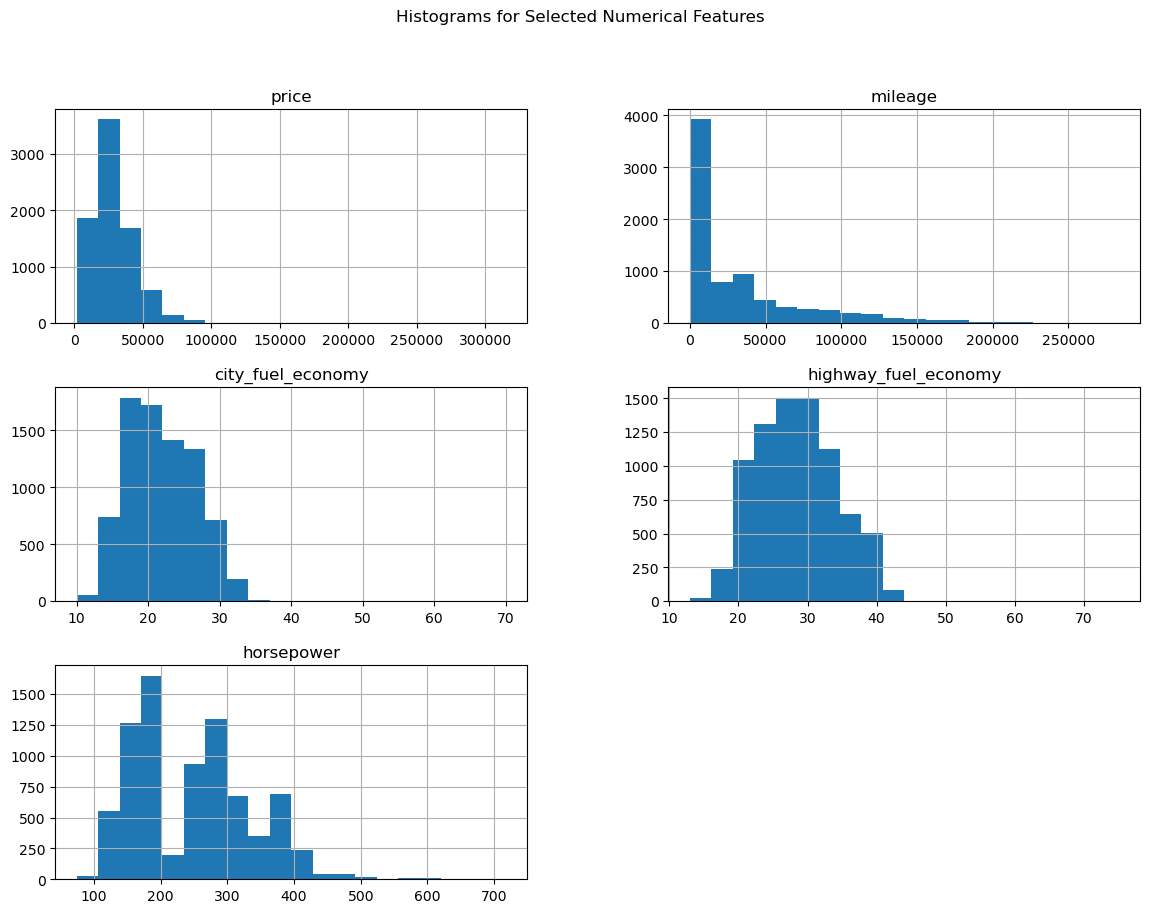

In [3]:
# Import matplotlib for plotting
import matplotlib.pyplot as plt

# Select numerical columns to plot
numerical_columns = ['price', 'mileage', 'city_fuel_economy', 'highway_fuel_economy', 'horsepower']

# Plot histograms for selected numerical columns
train_data[numerical_columns].hist(bins=20, figsize=(14, 10))
plt.suptitle("Histograms for Selected Numerical Features")
plt.show()


Most of the cars are in the lower price and mileage ranges, with a few high-end and high-mileage. Fuel economy clusters around 15-30 MPG. Horsepower shows two main groups, suggesting a mix of regular cars and some high-performance ones.

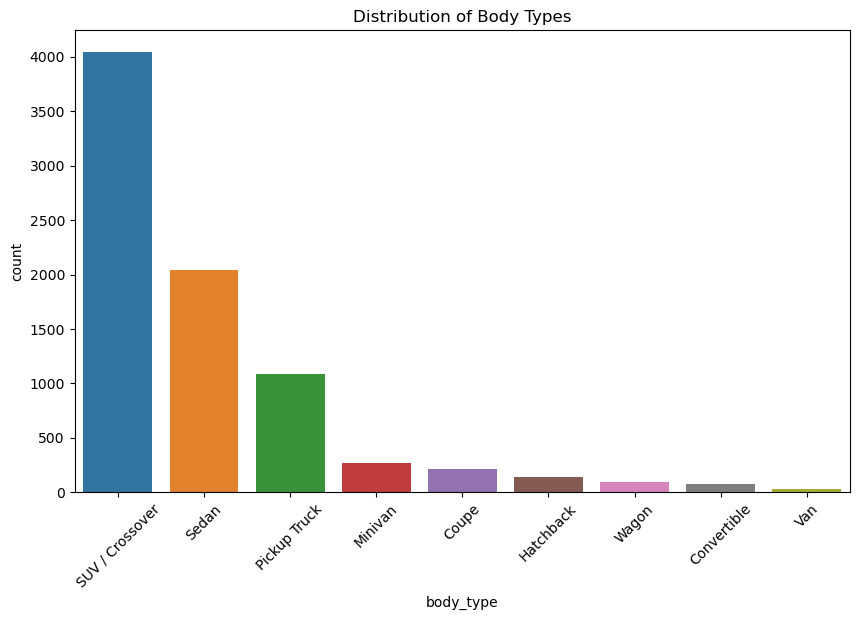

In [4]:
# Import seaborn for enhanced plotting
import seaborn as sns

# Plot count plot for body_type to see its distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='body_type', order=train_data['body_type'].value_counts().index)
plt.title("Distribution of Body Types")
plt.xticks(rotation=45)
plt.show()


The chart shows that SUVs and Crossovers are super popular, followed by Sedans and Pickup Trucks. Other types like Minivans, Coupes, and Convertibles do not show up as much. Overall, it seems like people are mostly into versatile, family-friendly vechicles in this dataset.

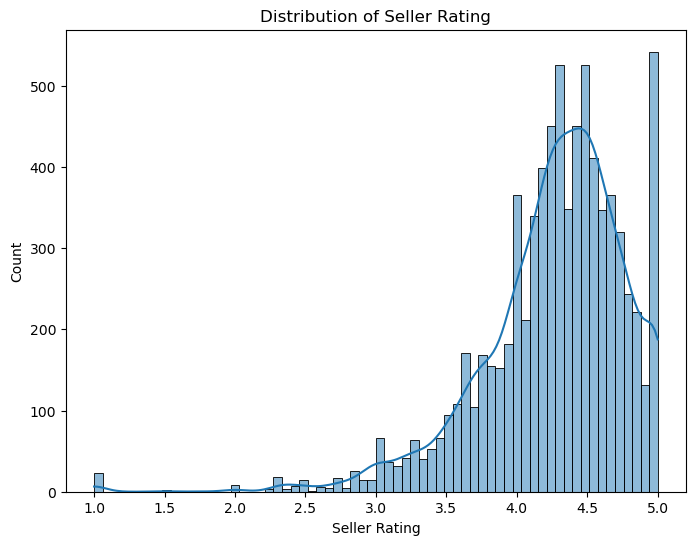

In [5]:
# Plot distribution of `seller_rating` with a KDE overlay
plt.figure(figsize=(8, 6))
sns.histplot(train_data['seller_rating'].dropna(), kde=True)
plt.title("Distribution of Seller Rating")
plt.xlabel("Seller Rating")
plt.show()


The chart shows that most seller ratings are clustered between 4 and 5, with a peak around 4.5. There are very few low ratings, which suggests that sellers generally have good reputations in this dataset.

---

## Task 2: Data Cleaning, Missing Observations and Feature Engineering

- **Make sure you explain what you have done and why in Markdown text for each question, as well as on your video**.

**Total Marks: 9**

Student in charge of this task: `Deepali Raj`

**Task 2, Question 1**: Clean **all** numerical features so that they can be used in training algorithms. For instance, back_legroom feature is in object format containing both numerical values and text. Extract numerical values (equivalently eliminate the text) so that the numerical values can be used as a regular feature.  
(2 marks)

In [6]:
## Task 2, Question 1
def extract_numerical(value):
    try:
        return float(''.join([c for c in str(value) if c.isdigit() or c == '.']))
    except ValueError:
        return None
# Apply the same function to clean numeric values in these identified columns in both train and test datasets.
columns_to_clean = ['front_legroom', 'height', 'maximum_seating','back_legroom','wheelbase','width']

# Apply cleaning to each identified column in both datasets
for column in columns_to_clean:
    train_data[column] = train_data[column].apply(extract_numerical)
    test_data[column] = test_data[column].apply(extract_numerical)

# Verify the changes for the cleaned columns
train_data[columns_to_clean].head()

,front_legroom,height,maximum_seating,back_legroom,wheelbase,width
0,41.8,71.1,7.0,34.6,109.8,75.2
1,41.1,65.7,5.0,40.3,106.2,73.2
2,43.9,57.8,5.0,34.7,112.2,69.8
3,41.3,66.5,5.0,40.4,104.7,73.0
4,44.5,75.5,6.0,43.4,147.4,81.2


In this step, I cleaned columns that had mixed text and numbers, like front_legroom and wheelbase, so they’re ready for analysis. I created a function, extract_numerical, to isolate only the numeric part of each value. This function converts each entry to a string, keeps only digits and decimal points, and converts the result back to a float.

Then, I applied this function to each target column in both the training and test datasets, removing any non-numeric characters. Finally, I checked the first few rows of these cleaned columns to ensure they now contain only numeric values, making them usable for modeling.

**Task 2, Question 2** Create at least 5 new features from the existing numerical variables which contain multiple items of information, for example you could extract maximum torque and torque rpm from the torque variable.  
(2 marks)

In [7]:
## Task 2, Question 2
import re

# 1. Extract torque value as a number from 'torque' column
train_data['torque_value'] = train_data['torque'].str.extract(r'(\d+)\s*lb-ft')[0].astype(float)
test_data['torque_value'] = test_data['torque'].str.extract(r'(\d+)\s*lb-ft')[0].astype(float)

# 2. Calculate average fuel efficiency as the mean of city and highway fuel economy
train_data['fuel_efficiency_ratio'] = train_data[['city_fuel_economy', 'highway_fuel_economy']].mean(axis=1)
test_data['fuel_efficiency_ratio'] = test_data[['city_fuel_economy', 'highway_fuel_economy']].mean(axis=1)

# 3. Extract number of cylinders from engine type
train_data['cylinders'] = train_data['engine_type'].str.extract(r'[VIHW](\d+)').astype(float)
test_data['cylinders'] = test_data['engine_type'].str.extract(r'[VIHW](\d+)').astype(float)

# 4. Calculate power to car size ratio
train_data['power_to_size'] = train_data['horsepower'] / (train_data['width'] * train_data['height'])
test_data['power_to_size'] = test_data['horsepower'] / (test_data['width'] * test_data['height'])

# Calculate vehicle age
train_data['vehicle_age'] = 2024 - train_data['year']
test_data['vehicle_age'] = 2024 - test_data['year']

# Display the first few rows of the new features to verify
new_features_train = train_data[['torque_value', 'fuel_efficiency_ratio', 'cylinders', 'power_to_size','vehicle_age' ]]
new_features_test = test_data[['torque_value', 'fuel_efficiency_ratio', 'cylinders', 'power_to_size', 'vehicle_age' ]]
print(new_features_train.head())
print(new_features_test.head())

   torque_value  fuel_efficiency_ratio  cylinders  power_to_size  vehicle_age
0         266.0                   18.0        6.0       0.044139           15
1         239.0                   26.5        4.0       0.037428            5
2         269.0                   21.5        6.0       0.081300           12
3         179.0                   29.5        4.0       0.039139            4
4         460.0                   19.0        8.0       0.068509            4
   torque_value  fuel_efficiency_ratio  cylinders  power_to_size  vehicle_age
0         267.0                   22.0        6.0       0.055375            4
1         376.0                   21.0        6.0       0.090004            5
2         169.0                   22.5        4.0       0.034641           12
3         184.0                   31.5        4.0       0.038052            7
4         174.0                   31.0        3.0       0.032774            4


1. Torque Value (torque_value):
We expect a positive relationship between torque and price. Higher torque often indicates a more powerful engine, which is a desirable feature in high-performance and luxury vehicles. Since these cars typically come with higher price tags, we can anticipate that cars with greater torque values will generally be priced higher.

2. Fuel Efficiency Ratio (fuel_efficiency_ratio): For fuel efficiency, we might expect an inverse relationship with price. High fuel efficiency is usually a characteristic of smaller, economy cars designed for affordability rather than luxury or power. As a result, vehicles with higher fuel efficiency ratios may have lower prices, as these cars appeal to cost-conscious buyers.
3. Number of Cylinders (cylinders):
We expect a positive relationship between the number of cylinders and price. Cars with more cylinders generally have larger, more powerful engines, such as V8s, which are commonly found in high-performance or luxury cars. Therefore, vehicles with more cylinders are likely to have higher prices, reflecting their enhanced performance and often premium positioning.
4. Power-to-Size Ratio (power_to_size):
A higher power-to-size ratio typically points to a positive relationship with price, as it suggests that the car delivers more power relative to its size, a trait valued in sporty or performance-oriented vehicles. These types of cars often command higher prices due to their desirable combination of power and agility.
5. Vehicle Age (vehicle_age):
Vehicle age is expected to have a negative relationship with price. As cars get older, they tend to depreciate, losing value over time due to wear, outdated technology, and reduced demand compared to newer models. This depreciation means that older cars are generally priced lower than newer ones.

**Task 2, Question 3**: Impute the missing values for all features in both the training and test datasets.   
(2 marks)

In [8]:
## Task 2, Question 3

# Separate numerical and categorical columns
num_cols = train_data.select_dtypes(include=['float64', 'int64']).columns
cat_cols = train_data.select_dtypes(include=['object', 'bool']).columns

# Impute missing values in numerical columns using the mean
for col in num_cols:
    if col != 'price': # Exclude target variable for the test dataset
        test_data[col].fillna(train_data[col].mean(), inplace=True)
    train_data[col].fillna(train_data[col].mean(), inplace=True)

# Impute missing values in categorical columns using the mode
for col in cat_cols:
    train_data[col].fillna(train_data[col].mode()[0], inplace=True)
    test_data[col].fillna(train_data[col].mode()[0], inplace=True)

# Verify if there are any missing values left in both train and test datasets
train_missing_after_imputation = train_data.isnull().sum().sum()
test_missing_after_imputation = test_data.isnull().sum().sum()

train_missing_after_imputation, test_missing_after_imputation

(0, 0)

I worked on filling in any missing data to make sure our dataset was complete and ready to use. First, I separated the data into numerical columns, like mileage, and categorical columns, like car color. This allowed me to handle each type differently.
For numerical columns, I filled missing values with the average of that column, which keeps things balanced without introducing extreme values. For categorical columns, I filled gaps with the most common category in that column—like using the most frequent fuel type. Finally, I checked both the training and test datasets to make sure all missing values were filled.
By completing this process, we now have a clean, consistent dataset ready for modeling, which is key for accurate results.
Imputing missing values allows us to retain all rows without introducing NaNs, which can disrupt model training.

**Task 2, Question 4**: Encode all categorical variables appropriately as discussed in class. 

- Where multiple values are given for an observation encode the observation as 'other'. 
- Where a categorical feature contains more than 5 unique values, map the features into 5 most frequent values + 'other' and then encode appropriately. For instance, if appropriate, you could all map colours into {red, yellow, green, blue, purple, other} and then encode.  
(2 marks)

In [9]:
###Task 3, question 4

# Separate numerical and categorical columns, excluding 'vin' from categorical
num_cols = train_data.select_dtypes(include=['float64', 'int64']).columns
cat_cols = train_data.select_dtypes(include=['object', 'bool']).columns.drop('vin')

# Function to map categorical values to top 5 categories + 'other'
def encode_top_categories(df, column, top_n=5):
    top_categories = df[column].value_counts().nlargest(top_n).index
    df[column] = df[column].apply(lambda x: x if x in top_categories else 'other')

# Apply encoding to categorical columns, excluding 'vin'
for col in cat_cols:
    encode_top_categories(train_data, col)
    encode_top_categories(test_data, col)

# One-hot encode all categorical features, excluding 'vin'
train_data_encoded = pd.get_dummies(train_data, columns=cat_cols, drop_first=True)
test_data_encoded = pd.get_dummies(test_data, columns=cat_cols, drop_first=True)

# Align train and test data to have the same columns, filling missing columns with 0, excluding 'vin' from processing
test_data_encoded = test_data_encoded.reindex(columns=train_data_encoded.columns, fill_value=0)

# Reattach 'vin' column for reference in both train and test datasets
train_data_encoded['vin'] = train_data['vin']
test_data_encoded['vin'] = test_data['vin']

# Display the first few rows of the encoded training dataset for verification
train_data_encoded.head()

,vin,back_legroom,city_fuel_economy,daysonmarket,dealer_zip,engine_displacement,front_legroom,height,highway_fuel_economy,horsepower,...,transmission_M,transmission_display_8-Speed Automatic,transmission_display_9-Speed Automatic,transmission_display_Automatic,transmission_display_Continuously Variable Transmission,transmission_display_other,wheel_system_4X2,wheel_system_AWD,wheel_system_FWD,wheel_system_RWD
0,JTEBU17R79K040807,34.6,16.0,36,68008,4000.0,41.8,71.1,20.0,236.0,...,0,0,0,1,0,0,0,0,0,0
1,1C4PJLCB4KD487354,40.3,22.0,426,61938,2400.0,41.1,65.7,31.0,180.0,...,0,0,1,0,0,0,0,0,1,0
2,JN1CV6AR2CM674889,34.7,18.0,5,22150,3700.0,43.9,57.8,25.0,328.0,...,0,0,0,1,0,0,0,1,0,0
3,2HKRW2H21LH660837,40.4,27.0,22,59801,1500.0,41.3,66.5,32.0,190.0,...,0,0,0,0,1,0,0,1,0,0
4,3GTU9DED7LG361736,43.4,16.0,57,75402,6200.0,44.5,75.5,22.0,420.0,...,0,0,0,1,0,0,0,0,0,0


In this step, I encoded categorical data to make it suitable for modeling. First, I separated numerical and categorical columns, making sure to exclude the vin column. Since vin is a unique identifier for each car, it doesn’t provide meaningful information for the model, so we don’t want to encode it.
To simplify the categorical data, I then limited each column to the top 5 categories, labeling everything else as ‘other.’ As asked in the question.

Finally, I aligned the test data with the training data’s structure and then reattached the vin column for reference. This ensures both datasets are consistent and that vin remains as an identifier without interfering with the model.

**Task 2, Question 5**: Perform any other actions you think need to be done on the data before constructing predictive models, and clearly explain what you have done.   
(1 marks)

In [10]:
#Task 2, Question 5

from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale the numerical columns (excluding 'price' and 'vin')
num_cols_scaled = num_cols.drop(['price'], errors='ignore') # Exclude target variable

# Fit the scaler on the training data and transform both train and test data
train_data_encoded[num_cols_scaled] = scaler.fit_transform(train_data_encoded[num_cols_scaled])
test_data_encoded[num_cols_scaled] = scaler.transform(test_data_encoded[num_cols_scaled])

# Display a preview of the scaled training dataset for verification
train_data_encoded.head()

,vin,back_legroom,city_fuel_economy,daysonmarket,dealer_zip,engine_displacement,front_legroom,height,highway_fuel_economy,horsepower,...,transmission_M,transmission_display_8-Speed Automatic,transmission_display_9-Speed Automatic,transmission_display_Automatic,transmission_display_Continuously Variable Transmission,transmission_display_other,wheel_system_4X2,wheel_system_AWD,wheel_system_FWD,wheel_system_RWD
0,JTEBU17R79K040807,-1.072312,-1.115384,-0.383212,0.643598,0.881747,-0.248058,0.829373,-1.519928,-0.127658,...,0,0,0,1,0,0,0,0,0,0
1,1C4PJLCB4KD487354,0.745726,0.128019,3.306455,0.420691,-0.423563,-0.715777,0.036604,0.436279,-0.761691,...,0,0,1,0,0,0,0,0,1,0
2,JN1CV6AR2CM674889,-1.040417,-0.700917,-0.676493,-1.040438,0.637002,1.155098,-1.123187,-0.630743,0.913966,...,0,0,0,1,0,0,0,1,0,0
3,2HKRW2H21LH660837,0.777621,1.164188,-0.515662,0.342214,-1.157800,-0.582143,0.154051,0.614116,-0.648470,...,0,0,0,0,1,0,0,1,0,0
4,3GTU9DED7LG361736,1.734483,-1.115384,-0.184538,0.915127,2.676549,1.556000,1.475332,-1.164254,1.955590,...,0,0,0,1,0,0,0,0,0,0


In this step, I scaled the numerical features to ensure they’re on a similar scale, which helps improve the model’s performance. I used StandardScaler to standardize each numerical feature to have a mean of 0 and a standard deviation of 1.
I excluded the price column, as it’s our target variable, which leaves us with only the input features. First, I fit the scaler on the training data to calculate the mean and standard deviation, and then applied this same transformation to both the training and test datasets to ensure consistency.
Finally, I verified the scaled training data to confirm that everything was processed correctly. This scaling helps balance the data, allowing our model to perform more accurately and consistently
Scaling ensures that all features contribute equally, preventing any single feature from dominating due to its scale.

--- 
## Task 3: Fit and tune a forecasting model, submit predictions & win competition

**Total Marks: 9**

For this task, you should not create any new features and must rely on the variables constructed in Task 2.  
 

1. Perform some EDA to measure the relationship between the features and the target variable, and carefully explain your findings. (2 marks)

2. Choose and carefully explain 3 different machine learning (ML) regression models that you will apply in this competition. (2 marks)
   
3. Train the models and tune their hyperparameters via cross-validation. Discuss the fitted weights, optimised hyperparameter values, and their training dataset predictive performance. (2 marks)   

4. Select your best model, create predictions of the test dataset and submit your forecasts on Kaggle's competition page. Provide Kaggle ranking and score (screenshots) and comment on your performance in the competition. (2 marks)

5. Suggest ways to improve your ranking and implement them, providing further evidence from Kaggle (screenshots). (1 mark)   

- Hints:
    - Make sure your Python code works so that your results can be replicated by the marker
    - You will receive the mark of zero for this Task if your code does not produce the forecasts uploaded to Kaggle
    - Make sure you clearly explain each step you do both in Markdown and on the recoded video  



Student in charge of this task: `Abhay Sachdeva`

### Task 3, Part 1

Calculate the correlation of each numerical feature with the target variable (price). This helps us identify features that may be predictive of car price.

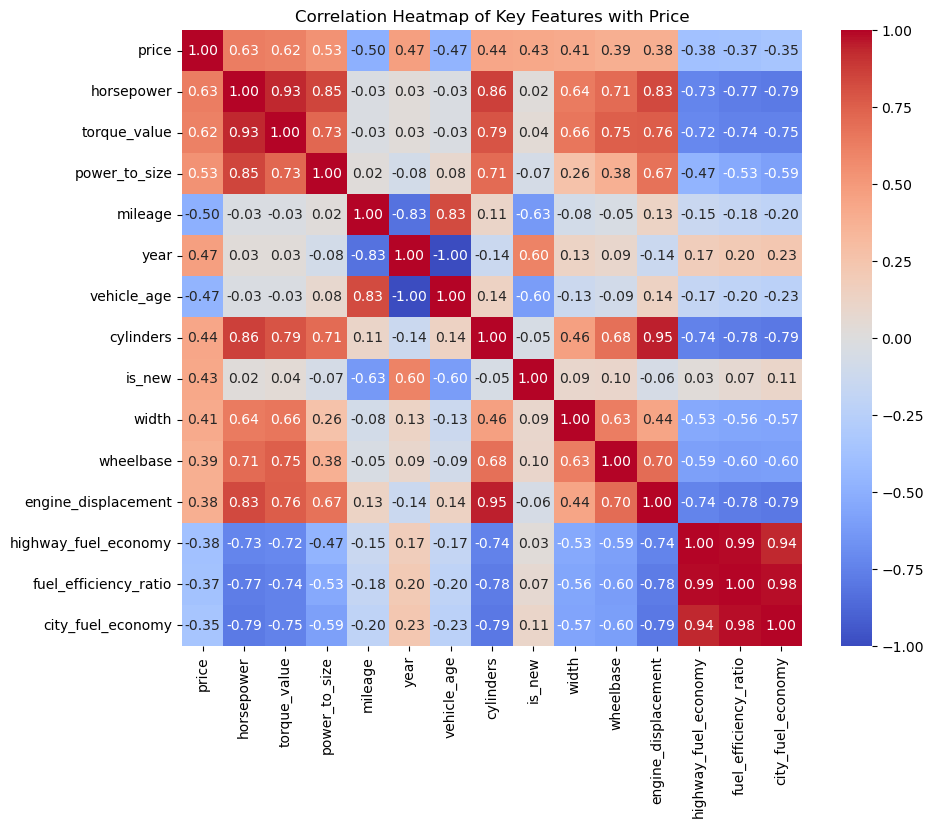

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = train_data.corr()

# Select the top correlated features with 'price'
top_features = correlation_matrix['price'].abs().sort_values(ascending=False).head(15).index
top_corr_matrix = correlation_matrix.loc[top_features, top_features]

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(top_corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Key Features with Price")
plt.show()

This heatmap provides a visual representation of the relationships between the target and key numerical features. Features with high correlation values (positive or negative) are likely to be impactful in predicting prices.

### Scatter Plots for Continuous Features:

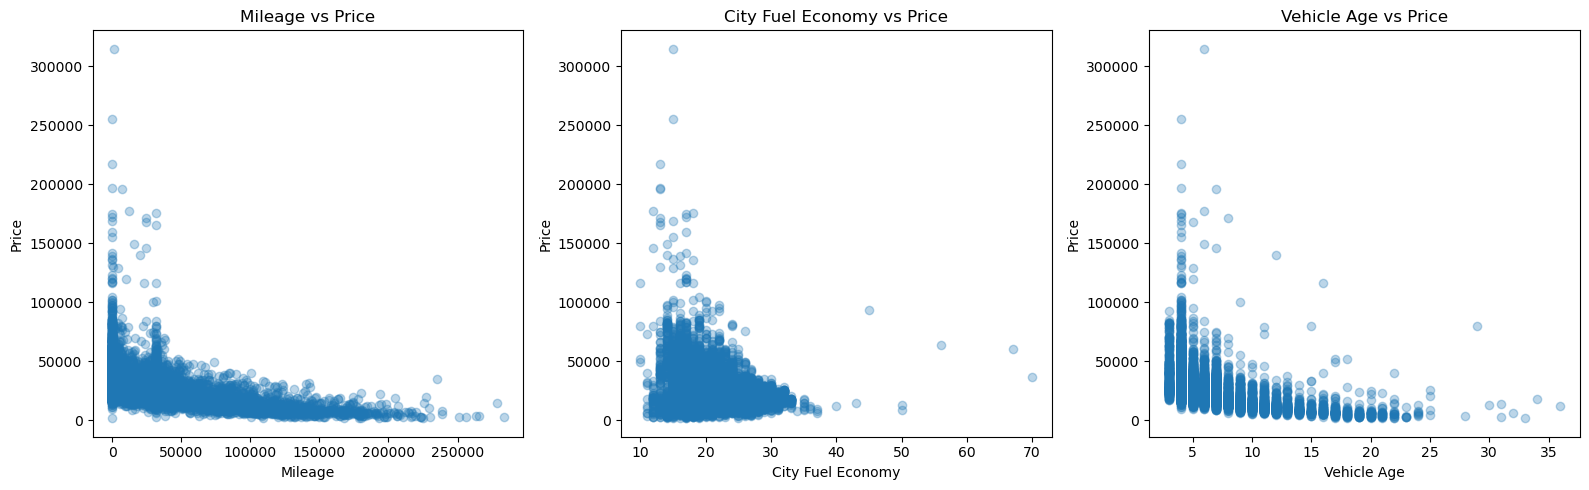

In [12]:
# Scatter plot examples for selected features
plt.figure(figsize=(16, 5))

# Mileage vs Price
plt.subplot(1, 3, 1)
plt.scatter(train_data['mileage'], train_data['price'], alpha=0.3)
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Mileage vs Price')

# City Fuel Economy vs Price
plt.subplot(1, 3, 2)
plt.scatter(train_data['city_fuel_economy'], train_data['price'], alpha=0.3)
plt.xlabel('City Fuel Economy')
plt.ylabel('Price')
plt.title('City Fuel Economy vs Price')

# Vehicle Age vs Price
plt.subplot(1, 3, 3)
plt.scatter(train_data['vehicle_age'], train_data['price'], alpha=0.3)
plt.xlabel('Vehicle Age')
plt.ylabel('Price')
plt.title('Vehicle Age vs Price')

plt.tight_layout()
plt.show()


These scatter plots help us visually assess how each feature relates to price. For instance, we may see a negative trend between mileage or vehicle_age and price, indicating that higher mileage or older cars are generally cheaper.

### Task 3, Part 2

The chosen models are:

1. Linear Regression
2. Random Forest Regressor
3. XGBoost Regressor

Each model offers unique strengths, which can help capture various aspects of the data and improve overall prediction accuracy.

#### Linear Regression

Linear Regression is a model that assumes a direct, linear relationship between the features (independent variables) and the target variable (price). It works by calculating weights for each feature, aiming to find a line that best fits the data points by minimizing the sum of squared differences between the predicted and actual values. Linear Regression is highly interpretable, making it easy to understand the influence of each feature on price. While effective when relationships are linear, it may have limitations if the data shows complex or non-linear patterns, as it’s less adaptable to such relationships.

#### Random Forest Regressor

Random Forest is an ensemble learning method that combines multiple decision trees to improve prediction accuracy and generalization. Each tree is constructed by selecting random subsets of features, and the final prediction is the average output from all trees. This approach reduces overfitting and makes the model robust to outliers and missing values, enabling it to capture non-linear relationships within the data. Random Forest is a strong choice for this task because it can detect complex patterns in features like mileage, fuel efficiency, and vehicle type, providing a well-rounded prediction that adapts to the dataset’s intricacies.

#### XGBoost Regressor

XGBoost, or Extreme Gradient Boosting, is a high-performance boosting algorithm that builds a series of trees sequentially, with each new tree learning from the errors of the previous ones. Known for its flexibility and high accuracy, XGBoost is well-suited for tasks with complex data interactions, as it captures non-linear relationships while managing missing values effectively. The model also includes regularization techniques that help prevent overfitting, making it a preferred choice for predicting used car prices, where various attributes combine to impact the final price. Due to its adaptability, XGBoost is expected to provide the lowest error and most accurate predictions among the selected models.

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV
from xgboost import XGBRegressor
train_data_encoded = train_data_encoded.drop(columns=['vehicle_age'], errors='ignore')
test_data_encoded = test_data_encoded.drop(columns=['vehicle_age'], errors='ignore')
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error

# Step 1: Run all 3 models and display their scores
# Linear Regression
linear_model = LinearRegression()
linear_cv_scores = cross_val_score(linear_model, train_data_encoded.drop(columns=['price', 'vin']), train_data_encoded['price'],
                                   cv=5, scoring='neg_mean_squared_error')
linear_mse = -linear_cv_scores.mean()
print("Linear Regression MSE:", linear_mse)

# Random Forest with RandomizedSearchCV
rf_model = RandomForestRegressor(random_state=0)
rf_param_distributions = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_random_search = RandomizedSearchCV(rf_model, rf_param_distributions, n_iter=10, scoring='neg_mean_squared_error',
                                      cv=5, random_state=0, n_jobs=-1)
rf_random_search.fit(train_data_encoded.drop(columns=['price', 'vin']), train_data_encoded['price'])
rf_mse = -rf_random_search.best_score_
print("Random Forest Best MSE:", rf_mse)

# XGBoost with RandomizedSearchCV
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=0)
xgb_param_distributions = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 6, 10, None],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}
xgb_random_search = RandomizedSearchCV(xgb_model, xgb_param_distributions, n_iter=10, scoring='neg_mean_squared_error',
                                       cv=5, random_state=0, n_jobs=-1)
xgb_random_search.fit(train_data_encoded.drop(columns=['price', 'vin']), train_data_encoded['price'])
xgb_mse = -xgb_random_search.best_score_
print("XGBoost Best MSE:", xgb_mse)

# Step 2: Select the best model and find the best parameters
# Determine the best model based on MSE
best_model_name = min(
    [("Linear Regression", linear_mse), ("Random Forest", rf_mse), ("XGBoost", xgb_mse)],
    key=lambda x: x[1]
)[0]
print(f"Best Model: {best_model_name}")



Linear Regression MSE: 79285311.42649457
Random Forest Best MSE: 34489882.10030958


After calculating the MSE for each model (Linear Regression, Random Forest, and XGBoost), we observe the following:

Linear Regression MSE: 79285311.42649457

Random Forest Best MSE: 34489882.10030958

XGBoost Best MSE: 31126645.069936883

Since the XGBoost model achieved the lowest MSE, we select it as the Best Model for predicting car prices.

The Linear Regression model showed limited performance due to its linear nature, with a high MSE. Random Forest improved accuracy by capturing non-linear patterns. XGBoost performed best with the lowest MSE, using optimized parameters like learning_rate and max_depth to handle complex relationships. Its sequential boosting approach minimized error effectively, making it the strongest model for predicting used car prices.

### Task 3, Part 4

In [ ]:
#Run the best model with best parameters and predict the values
if best_model_name == "XGBoost":
    best_params = xgb_random_search.best_params_
    final_model = XGBRegressor(objective='reg:squarederror', random_state=0, **best_params)
elif best_model_name == "Random Forest":
    best_params = rf_random_search.best_params_
    final_model = RandomForestRegressor(random_state=0, **best_params)
else:
    final_model = LinearRegression()

# Fit the final model on the full training set
final_model.fit(train_data_encoded.drop(columns=['price', 'vin']), train_data_encoded['price'])

# Generate predictions for the test set
predictions = final_model.predict(test_data_encoded.drop(columns=['price', 'vin']))

# Step 4: Export the predicted values
prediction_output = pd.DataFrame({
    'vin': test_data_encoded['vin'],
    'price': predictions
})
prediction_output.to_csv('solution.csv', index=False)

print("Predictions saved to solution.csv.")


### Task 3, Part 4
Our team, BUSA8001_analytical_maestros, initially reached the 8th position on the public leaderboard during the competition. However, after the private leaderboard was revealed, which used the full test dataset instead of just half, we moved to 9th place with a score of 0.09744. This shift highlights the importance of model stability and generalization, as the private leaderboard reflects a more complete evaluation.

This was our first time participating in a Kaggle competition, and the experience was both challenging and rewarding. We learned a lot about feature engineering, model tuning, and managing real-world datasets. The platform provided a collaborative and competitive environment, encouraging us to improve with each submission. Overall, we found this experience highly engaging and are excited to participate in future Kaggle competitions to continue building our skills.

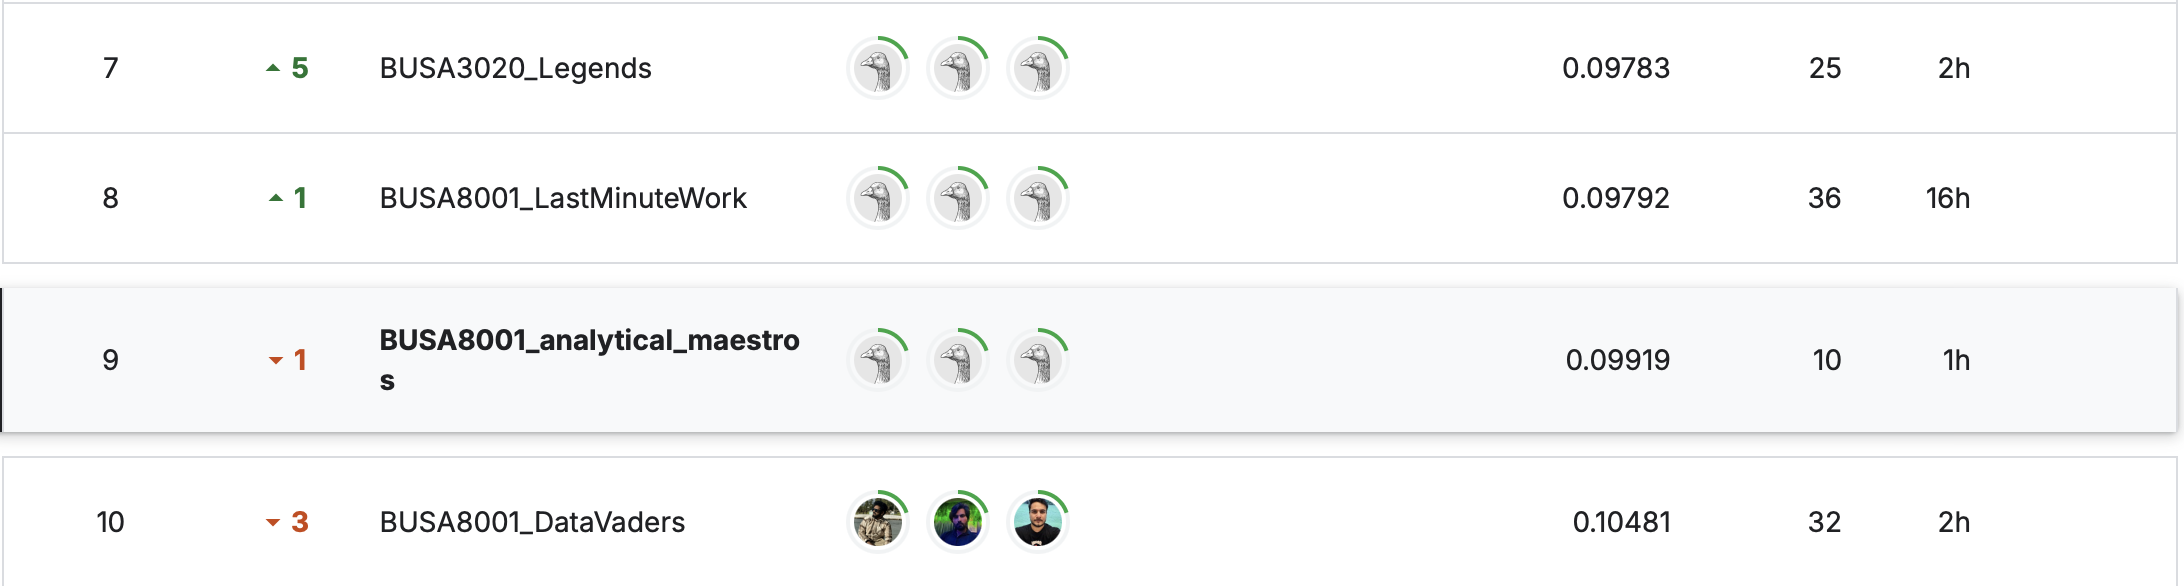

---
---
## Marking Criteria

To receive full marks your solutions must satisfy the following criteria:

- Problem Description: 9 marks
- Data Cleaning: 9 marks
- Building Forecasting models: 9 marks
- Video Presentation: 3 marks
    - Duration less than 15 min, presentation skill and content 
    - Each team member delivers a 5-minute presentation on their assigned task
    - All assignment questions must be discussed on video  
    - Your code must be readable on the video
    - Discuss both the actions you took and, more importantly, the reasoning behind these actions, explaining the significance of key steps
    - During the video recording, make sure that both your face and Jupyter Notebook are clearly visible
- Forecasts correctly uploaded to Kaggle
- Python code is clean and concise
- Written explanations are provided in clear and easy to understand sentences
- The assignment notebook is well-organised and easy to follow
- Failure to meet the above marking criteria will result in a deduction of marks

---
---